In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

In [6]:
a = pd.read_table('./s3-differential_expression.dir/baron-P1_vs_P3-limma-withoutlier.txt')
a['logp'] = -np.log10(a['P.Value'])
a.head()

gene_symbol     logFC   AveExpr         t   P.Value  adj.P.Val         B  \
0        Plek  2.586026  2.798499  9.379795  0.000001   0.005685  6.113583   
1       Rap1b  0.640690  8.062169  8.797055  0.000002   0.005685  5.145112   
2      Prokr2  2.382757 -0.611521  8.821870  0.000002   0.005685  4.976889   
3      Med12l  1.046439  3.457969  8.447867  0.000003   0.005685  4.968828   
4        Egfr  1.898184 -0.696462  8.543822  0.000003   0.005685  4.693116   

       logp  
0  5.998134  
1  5.714517  
2  5.726885  
3  5.537603  
4  5.586759

In [7]:
b = pd.read_table('./s3-differential_expression.dir/baron-P1_vs_P3-limma.txt')
b['logp'] = -np.log10(b['P.Value'])
b.head()

gene_symbol     logFC   AveExpr          t       P.Value  adj.P.Val  \
0       Dusp4 -2.687771  2.701526 -11.409484  2.848866e-07   0.000919   
1       Sall1 -2.419528  3.129191 -11.293920  3.148546e-07   0.000919   
2       Epha1 -2.477959  1.532139 -10.934833  4.320772e-07   0.000919   
3      Mogat2 -3.018023  2.941332 -10.893841  4.482252e-07   0.000919   
4       Epha2 -2.509838  1.857811 -10.604912  5.824772e-07   0.000919   

          B      logp  
0  7.416196  6.545328  
1  7.291094  6.501890  
2  6.958261  6.364439  
3  6.949021  6.348504  
4  6.701884  6.234721

In [8]:
c = a.merge(b, on='gene_symbol', suffixes=('with', 'without'))
c.head()

gene_symbol  logFCwith  AveExprwith     twith  P.Valuewith  adj.P.Valwith  \
0        Plek   2.586026     2.798499  9.379795     0.000001       0.005685   
1       Rap1b   0.640690     8.062169  8.797055     0.000002       0.005685   
2      Prokr2   2.382757    -0.611521  8.821870     0.000002       0.005685   
3      Med12l   1.046439     3.457969  8.447867     0.000003       0.005685   
4        Egfr   1.898184    -0.696462  8.543822     0.000003       0.005685   

      Bwith  logpwith  logFCwithout  AveExprwithout  twithout  P.Valuewithout  \
0  6.113583  5.998134      2.644654        2.933764  8.244784        0.000006   
1  5.145112  5.714517      0.701621        8.073395  9.523351        0.000002   
2  4.976889  5.726885      2.222793       -0.426503  7.690843        0.000012   
3  4.968828  5.537603      1.025234        3.520460  7.105325        0.000025   
4  4.693116  5.586759      1.804552       -0.452170  7.565165        0.000014   

   adj.P.Valwithout  Bwithout  logpwithout  
0          0.001829  4.230897     5.195559  
1          0.001261  5.267648     5.784406  
2          0.002282  3.681169     4.918555  
3          0.003024  2.700593     4.609622  
4          0.002428  3.543111     4.853686

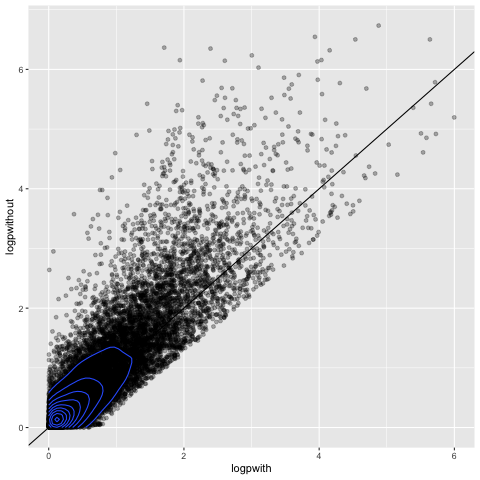

In [12]:
%%R -i c
ggplot(c, aes(x=logpwith, y=logpwithout)) + 
    geom_point(alpha=0.3) +
    geom_abline(intercept=0, slope=1) + 
    geom_density2d()

In [15]:
c['diff'] = c['logpwith'] - c['logpwithout']
c.head()

gene_symbol  logFCwith  AveExprwith     twith  P.Valuewith  adj.P.Valwith  \
0        Plek   2.586026     2.798499  9.379795     0.000001       0.005685   
1       Rap1b   0.640690     8.062169  8.797055     0.000002       0.005685   
2      Prokr2   2.382757    -0.611521  8.821870     0.000002       0.005685   
3      Med12l   1.046439     3.457969  8.447867     0.000003       0.005685   
4        Egfr   1.898184    -0.696462  8.543822     0.000003       0.005685   

      Bwith  logpwith  logFCwithout  AveExprwithout  twithout  P.Valuewithout  \
0  6.113583  5.998134      2.644654        2.933764  8.244784        0.000006   
1  5.145112  5.714517      0.701621        8.073395  9.523351        0.000002   
2  4.976889  5.726885      2.222793       -0.426503  7.690843        0.000012   
3  4.968828  5.537603      1.025234        3.520460  7.105325        0.000025   
4  4.693116  5.586759      1.804552       -0.452170  7.565165        0.000014   

   adj.P.Valwithout  Bwithout  logpwithout      diff  
0          0.001829  4.230897     5.195559  0.802575  
1          0.001261  5.267648     5.784406 -0.069890  
2          0.002282  3.681169     4.918555  0.808331  
3          0.003024  2.700593     4.609622  0.927981  
4          0.002428  3.543111     4.853686  0.733072

In [19]:
c['diff'].describe()

count    14591.000000
mean        -0.158756
std          0.502375
min         -4.655858
25%         -0.330908
50%         -0.048747
75%          0.127733
max          0.927981
Name: diff, dtype: float64

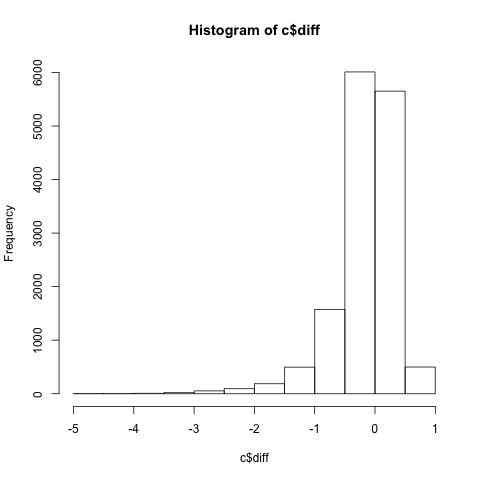

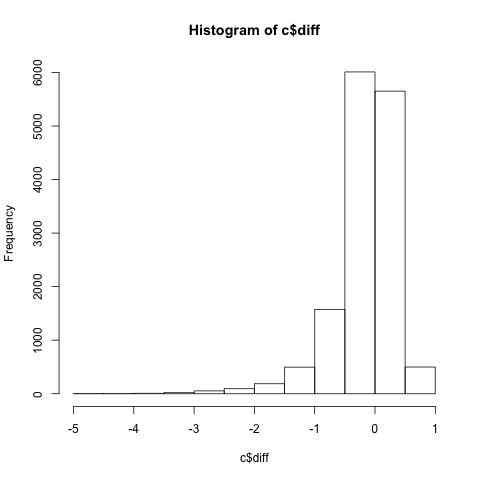

In [17]:
%%R -i c
plot(hist(c$diff))

In [19]:
sys.path.append('../alignment/pipeline')
import align

In [22]:
infiles = glob.glob('./s1-alignment.dir/star/*/*Gene.out.tab')

In [55]:
reload(align)
df = align.merge(infiles, annotation='GRCm38.p6', collapse=True)

In [56]:
df.head()

P4-1  P4-2  P4-3  P5-1  P5-2  P5-3  P6-1  P6-2  P6-3  P7-1  \
gene_symbol                                                                 
0610005C13Rik    31    22    18    34    36    32    32    82    41    79   
0610006L08Rik     0     0     0     0     0     0     0     0     0     0   
0610009B22Rik   623   665   605   544   742   484   677   634   528   598   
0610009E02Rik     4     7     3     1     6     9     9     7     6    18   
0610009L18Rik     2     4     5     4    14     0     3     2    12     9   

               P7-2  P7-3  
gene_symbol                
0610005C13Rik    27   123  
0610006L08Rik     0     0  
0610009B22Rik   180   807  
0610009E02Rik     4    11  
0610009L18Rik     3    19

In [57]:
rename_dict = {'P4': 'P1', 'P5': 'P2', 'P6': 'P3', 'P7': 'DN'}

In [62]:
# Loop
for key, value in rename_dict.items():
    colnames = [x.replace(key, value) for x in colnames]
    
colnames

['P1-1',
 'P1-2',
 'P1-3',
 'P2-1',
 'P2-2',
 'P2-3',
 'P3-1',
 'P3-2',
 'P3-3',
 'DN-1',
 'DN-2',
 'DN-3']

In [71]:
ss = pd.read_table('/Users/denis/Downloads/star_sig.txt')
ss['log10p'] = -np.log10(ss['P.Value'])
ss.head()

gene_symbol     logFC   AveExpr         t   P.Value  adj.P.Val         B  \
0      Atp1a2  5.690375 -3.631726  6.442548  0.001399   0.137960 -0.442206   
1        Noto  5.177239 -3.882000  5.449293  0.002931   0.166897 -1.081514   
2         Nog  5.063851 -3.173668  6.492537  0.001351   0.137960 -0.379033   
3       Hoxb9  4.882311 -0.594272  2.755049  0.040572   0.335790 -3.993873   
4         Trh  4.817092 -2.826352  3.974073  0.010843   0.229886 -2.317663   

     log10p  
0  2.854163  
1  2.533020  
2  2.869247  
3  1.391770  
4  1.964861

In [72]:
ks = pd.read_table('/Users/denis/Downloads/kallisto_sig.txt')
ks['log10p'] = -np.log10(ks['P.Value'])
ks.head()

gene_symbol     logFC   AveExpr          t   P.Value  adj.P.Val         B  \
0  AC139209.1  5.354830 -1.142538   2.076060  0.091310   0.432128 -4.545486   
1     Gm20481  5.282606 -1.637608   4.655298  0.005257   0.194744 -1.624482   
2        Noto  5.052047 -4.144153   5.660692  0.002228   0.166767 -1.066455   
3      Gm5901  4.982639 -4.184045  16.324518  0.000013   0.062999  1.140479   
4         Trh  4.768378 -3.049233   3.963470  0.010247   0.230341 -2.226780   

     log10p  
0  1.039483  
1  2.279298  
2  2.652168  
3  4.879636  
4  1.989410

In [73]:
merged = ss.merge(ks, on='gene_symbol', suffixes=('star', 'kallisto'))
merged.head()

gene_symbol  logFCstar  AveExprstar     tstar  P.Valuestar  adj.P.Valstar  \
0      Atp1a2   5.690375    -3.631726  6.442548     0.001399       0.137960   
1        Noto   5.177239    -3.882000  5.449293     0.002931       0.166897   
2         Nog   5.063851    -3.173668  6.492537     0.001351       0.137960   
3       Hoxb9   4.882311    -0.594272  2.755049     0.040572       0.335790   
4         Trh   4.817092    -2.826352  3.974073     0.010843       0.229886   

      Bstar  log10pstar  logFCkallisto  AveExprkallisto  tkallisto  \
0 -0.442206    2.854163       3.033376        -2.032633   4.156454   
1 -1.081514    2.533020       5.052047        -4.144153   5.660692   
2 -0.379033    2.869247       4.484712        -3.135548   6.489293   
3 -3.993873    1.391770       4.755912        -0.735898   2.670605   
4 -2.317663    1.964861       4.768378        -3.049233   3.963470   

   P.Valuekallisto  adj.P.Valkallisto  Bkallisto  log10pkallisto  
0         0.008447           0.218153  -2.063233        2.073275  
1         0.002228           0.166767  -1.066455        2.652168  
2         0.001193           0.150157  -0.479879        2.923357  
3         0.043348           0.340898  -3.870466        1.363031  
4         0.010247           0.230341  -2.226780        1.989410

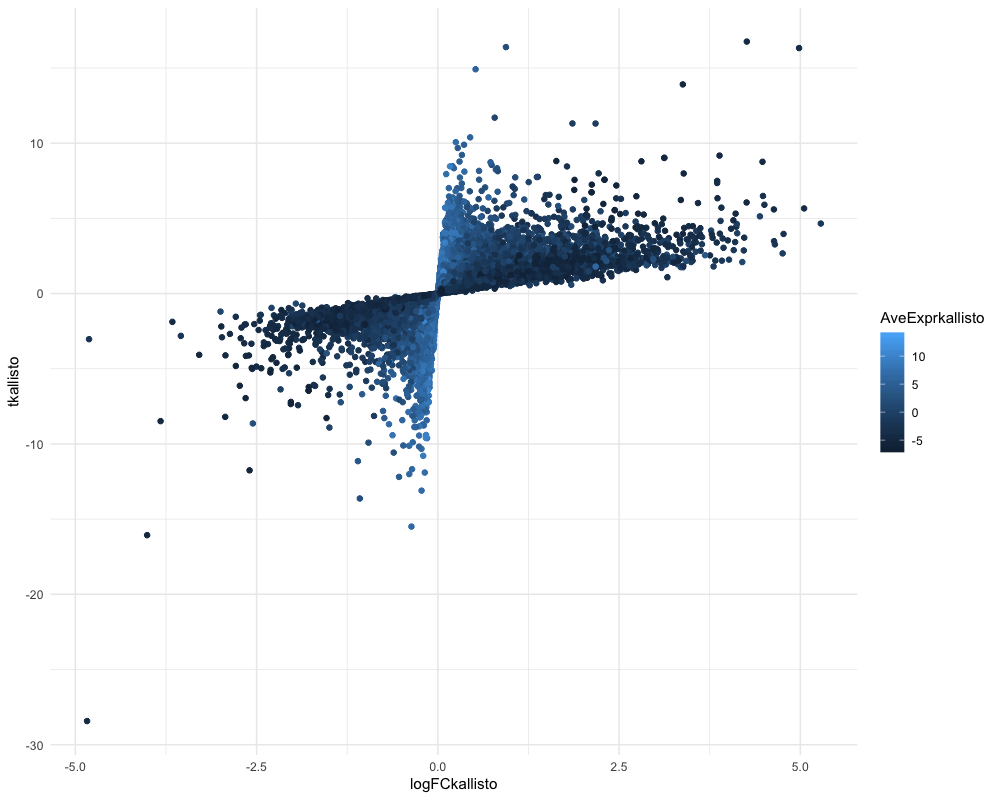

In [100]:
%%R -i merged -h 800 -w 1000 -r 100
ggplot(merged, aes(x=logFCkallisto, y=tkallisto, color=AveExprkallisto)) + geom_point() + theme_minimal()

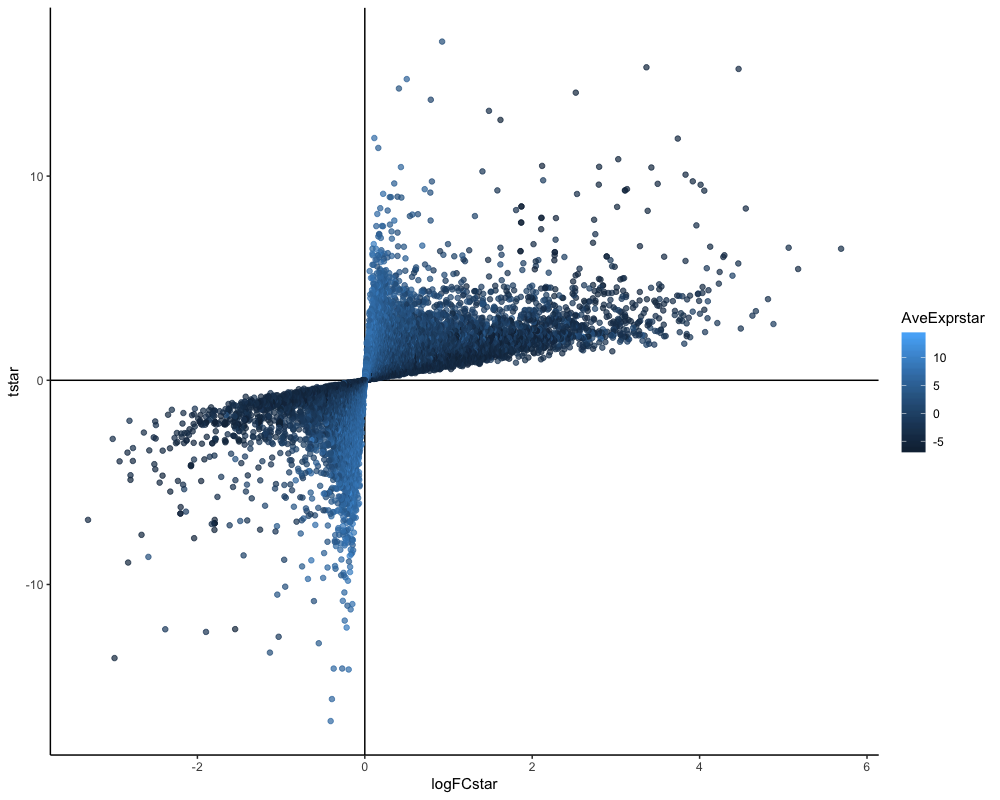

In [102]:
%%R -i merged -h 800 -w 1000 -r 100
ggplot(merged, aes(x=logFCstar, y=tstar, color=AveExprstar)) + theme_classic() + geom_vline(xintercept=0) + geom_hline(yintercept=0) + geom_point(alpha=0.7)

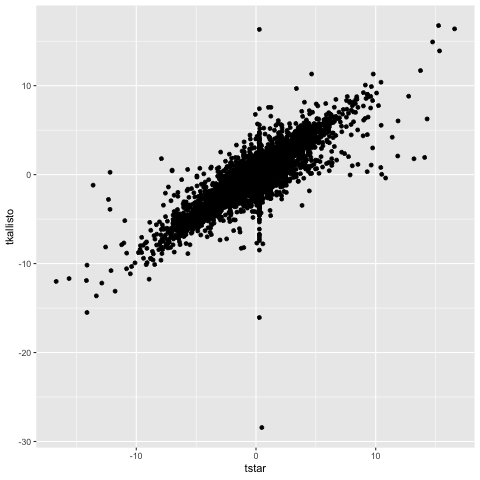

In [68]:
%%R -i merged
ggplot(merged, aes(x=tstar, y=tkallisto)) + geom_point()

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



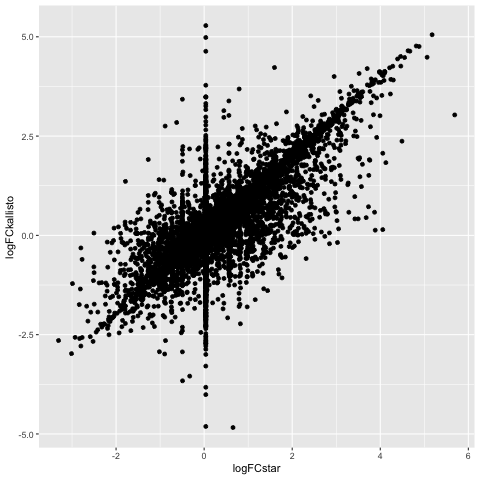

In [67]:
%%R -i merged
ggplot(merged, aes(x=logFCstar, y=logFCkallisto)) + geom_point()

In [43]:
annot = pd.read_table('../../analysis-pipelines/alignment/ensembl.dir/biomart/GRCh38.p12-genes.txt')
annot.head()

Gene stable ID Transcript stable ID Gene type   Gene name  \
0  ENSG00000284532      ENST00000585070     miRNA     MIR4723   
1  ENSG00000238933      ENST00000459194  misc_RNA     RF00019   
2  ENSG00000275693      ENST00000620386  misc_RNA     RF02116   
3  ENSG00000275451      ENST00000618314     miRNA     MIR6085   
4  ENSG00000222870      ENST00000410938     snRNA  RNU6-1328P   

  Chromosome/scaffold name  
0                       17  
1                        9  
2                       10  
3                       15  
4                        7

In [49]:
annot[['Gene stable ID', 'Gene name']].drop_duplicates()['Gene stable ID'].value_counts().sort_values(ascending=False)

ENSG00000276631    1
ENSG00000144824    1
ENSG00000111716    1
ENSG00000254097    1
ENSG00000151092    1
ENSG00000262801    1
ENSG00000224319    1
ENSG00000276200    1
ENSG00000113140    1
ENSG00000271147    1
ENSG00000276196    1
ENSG00000253877    1
ENSG00000114544    1
ENSG00000282641    1
ENSG00000088002    1
ENSG00000202411    1
ENSG00000277135    1
ENSG00000207716    1
ENSG00000224518    1
ENSG00000277403    1
ENSG00000267168    1
ENSG00000235269    1
ENSG00000283276    1
ENSG00000100368    1
ENSG00000266006    1
ENSG00000197635    1
ENSG00000228957    1
ENSG00000162396    1
ENSG00000199798    1
ENSG00000221782    1
                  ..
ENSG00000200719    1
ENSG00000233970    1
ENSG00000271976    1
ENSG00000277862    1
ENSG00000284575    1
ENSG00000258068    1
ENSG00000236571    1
ENSG00000229208    1
ENSG00000284359    1
ENSG00000127589    1
ENSG00000233219    1
ENSG00000201119    1
ENSG00000005421    1
ENSG00000274342    1
ENSG00000214783    1
ENSG00000207302    1
ENSG000001167

In [44]:
annot['Gene stable ID'].value_counts().sort_values(ascending=False)

ENSG00000109339    192
ENSG00000179818    170
ENSG00000280512    142
ENSG00000242086    142
ENSG00000281603    142
ENSG00000282953    139
ENSG00000280993    139
ENSG00000281060    138
ENSG00000281794    138
ENSG00000281915    138
ENSG00000285219    113
ENSG00000227036    106
ENSG00000226674    102
ENSG00000127990     99
ENSG00000197912     96
ENSG00000156113     93
ENSG00000196628     90
ENSG00000242808     90
ENSG00000126091     85
ENSG00000254166     84
ENSG00000007372     84
ENSG00000165795     78
ENSG00000205336     77
ENSG00000114861     76
ENSG00000182389     74
ENSG00000231898     73
ENSG00000228956     73
ENSG00000124155     72
ENSG00000237298     71
ENSG00000115525     69
                  ... 
ENSG00000284146      1
ENSG00000241168      1
ENSG00000202478      1
ENSG00000235069      1
ENSG00000225459      1
ENSG00000163737      1
ENSG00000269796      1
ENSG00000257476      1
ENSG00000243289      1
ENSG00000284110      1
ENSG00000236267      1
ENSG00000273641      1
ENSG0000020

In [42]:
df.sum()

sample
P4-1    46436747
P4-2    45738923
P4-3    45649399
P5-1    41413156
P5-2    49241539
P5-3    44817678
P6-1    47666604
P6-2    43722230
P6-3    39819946
P7-1    46811832
P7-2    13313533
P7-3    58444304
dtype: int64

In [30]:
df.drop(['N_ambiguous', 'N_multimapping', 'N_noFeature', 'N_unmapped']).sum()

sample
P4-1    46436747
P4-2    45738923
P4-3    45649399
P5-1    41413156
P5-2    49241539
P5-3    44817678
P6-1    47666604
P6-2    43722230
P6-3    39819946
P7-1    46811832
P7-2    13313533
P7-3    58444304
dtype: int64

In [11]:
human = pd.read_table('../alignment/ensembl.dir/biomart/GRCh38.p12-genes.txt').drop_duplicates('Gene name')['Gene type'].value_counts().rename('human').to_frame()
human.head()

human
protein_coding          20153
processed_pseudogene    10434
lincRNA                  7894
antisense                5757
unprocessed_pseudogene   2928

In [12]:
mouse = pd.read_table('../alignment/ensembl.dir/biomart/GRCm38.p6-genes.txt').drop_duplicates('Gene name')['Gene type'].value_counts().rename('mouse').to_frame()
mouse.head()

mouse
protein_coding        22060
processed_pseudogene   9653
lincRNA                5648
TEC                    3175
antisense              2855

In [18]:
meta[meta['Gene type'].isin(['miRNA', 'snRNA'])]

Gene stable ID Transcript stable ID Gene type    Gene name  \
0       ENSG00000284532      ENST00000585070     miRNA      MIR4723   
3       ENSG00000275451      ENST00000618314     miRNA      MIR6085   
4       ENSG00000222870      ENST00000410938     snRNA   RNU6-1328P   
5       ENSG00000252023      ENST00000516214     snRNA    RNU6-581P   
6       ENSG00000211579      ENST00000390224     miRNA       MIR759   
10      ENSG00000264763      ENST00000585286     miRNA      MIR4295   
11      ENSG00000283867      ENST00000408840     miRNA      MIR1307   
13      ENSG00000207975      ENST00000385240     miRNA     MIR181B1   
22      ENSG00000264881      ENST00000577266     miRNA     MIR1273D   
29      ENSG00000252039      ENST00000516230     snRNA    RNU6-287P   
31      ENSG00000223198      ENST00000411266     snRNA     RNU2-22P   
38      ENSG00000207340      ENST00000384610     snRNA      RNVU1-1   
40      ENSG00000277344      ENST00000516290     snRNA      RNU1-6P   
43      ENSG00000199246      ENST00000362376     snRNA    RNU6-896P   
48      ENSG00000264998      ENST00000580281     snRNA      RF00003   
50      ENSG00000252079      ENST00000516270     snRNA    RNU6-327P   
51      ENSG00000238419      ENST00000458818     snRNA    RNU7-186P   
55      ENSG00000252882      ENST00000517073     snRNA   RNU6-1137P   
56      ENSG00000201136      ENST00000364266     snRNA    RNU6-353P   
58      ENSG00000222990      ENST00000411058     snRNA     RNU4-22P   
61      ENSG00000251958      ENST00000516149     snRNA   RNU6-1102P   
64      ENSG00000212354      ENST00000391052     snRNA   RNU6-1242P   
65      ENSG00000199906      ENST00000363036     snRNA     RNU5B-2P   
68      ENSG00000199226      ENST00000362356     snRNA     RNU6-50P   
70      ENSG00000251834      ENST00000516025     snRNA    RNU6-319P   
71      ENSG00000265074      ENST00000580475     snRNA      RF00003   
76      ENSG00000207334      ENST00000384604     snRNA     RNU6-12P   
77      ENSG00000276479      ENST00000616567     miRNA     MIR548AZ   
78      ENSG00000222862      ENST00000410930     snRNA   RNU6-1086P   
82      ENSG00000266206      ENST00000578598     miRNA    MIR3926-1   
...                 ...                  ...       ...          ...   
225168  ENSG00000284918      ENST00000646315     miRNA       MIR939   
225169  ENSG00000285207      ENST00000642184     miRNA      MIR1234   
225170  ENSG00000285088      ENST00000646292     miRNA      MIR6849   
225200  ENSG00000285167      ENST00000643176     snRNA     RNU7-55P   
225201  ENSG00000285514      ENST00000642781     miRNA      MIR4660   
225207  ENSG00000285414      ENST00000644344     snRNA    RNU6-682P   
225249  ENSG00000284785      ENST00000644999     miRNA    MIR5692A2   
225259  ENSG00000285270      ENST00000644856     miRNA    MIR3926-1   
225260  ENSG00000284855      ENST00000646626     miRNA    MIR3926-2   
225265  ENSG00000284861      ENST00000645852     snRNA    RNU6-842P   
225466  ENSG00000285146      ENST00000642548     miRNA      MIR7703   
225736  ENSG00000285386      ENST00000642234     snRNA      RF00026   
225770  ENSG00000285481      ENST00000646220     snRNA   RNU6-1004P   
225810  ENSG00000285092      ENST00000642968     snRNA    RNU5E-10P   
225911  ENSG00000281563      ENST00000629966     snRNA    RNU6-943P   
225947  ENSG00000282009      ENST00000633683     snRNA     RNU6-17P   
226286  ENSG00000202250      ENST00000365380     snRNA    RNU6-771P   
226544  ENSG00000284492      ENST00000638760     miRNA      MIR6778   
226745  ENSG00000284451      ENST00000640459     snRNA    RNU6-222P   
226800  ENSG00000284545      ENST00000638544     snRNA    RNU6-222P   
226883  ENSG00000284524      ENST00000640947     snRNA    RNU6-222P   
227091  ENSG00000284279      ENST00000640936     snRNA    RNU6-222P   
227106  ENSG00000284022      ENST00000640667     snRNA    RNU6-222P   
227124  ENSG00000284303      ENST00000638196     snRNA    RNU6-222P   
227214  ENSG00000284897      ENST

In [15]:
merged = human.merge(mouse, left_index=True, right_index=True)
merged

human  mouse
protein_coding                      20153  22060
processed_pseudogene                10434   9653
lincRNA                              7894   5648
antisense                            5757   2855
unprocessed_pseudogene               2928   2632
miRNA                                1879   2202
snRNA                                1827   1385
misc_RNA                             1227    562
TEC                                  1096   3175
sense_intronic                        926    322
transcribed_unprocessed_pseudogene    917    236
processed_transcript                  732    783
snoRNA                                555   1482
transcribed_processed_pseudogene      486    284
IG_V_pseudogene                       192    153
sense_overlapping                     181     29
IG_V_gene                             153    218
transcribed_unitary_pseudogene        123     16
TR_V_gene                             111    144
unitary_pseudogene                     98     24
TR_J_gene                              79     70
bidirectional_promoter_lncRNA          73    176
rRNA                                   47    354
polymorphic_pseudogene                 44     80
pseudogene                             43    131
IG_D_gene                              37     19
TR_V_pseudogene                        34     34
3prime_overlapping_ncRNA               32      3
scaRNA                                 29     46
Mt_tRNA                                22     22
IG_J_gene                              18     14
IG_C_gene                              14     13
IG_C_pseudogene                         9      1
ribozyme                                8     22
TR_C_gene                               6      8
TR_D_gene                               4      4
TR_J_pseudogene                         4     10
sRNA                                    2      2
Mt_rRNA                                 2      2
scRNA                                   1      1
macro_lncRNA                            1      1
IG_pseudogene                           1      2

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



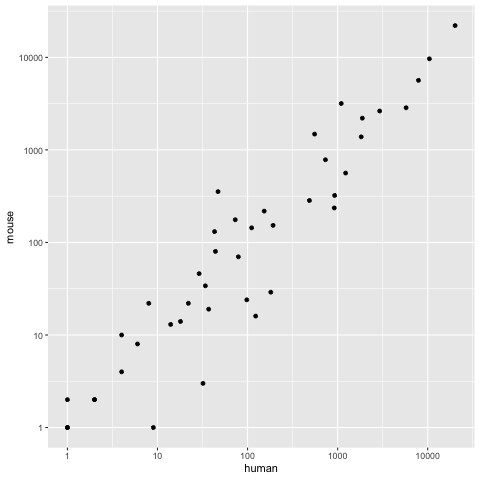

In [14]:
%%R -i merged
ggplot(merged, aes(x=human, y=mouse)) + geom_point() + scale_x_log10() + scale_y_log10()